In [49]:
import pandas as pd 
from pandas import Series, DataFrame
%pylab inline 
%matplotlib inline 
from patsy import dmatrices

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df[:5]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


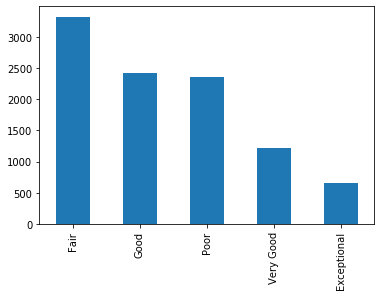

In [4]:
def getcredscore(s):
    a=''
    if s>=300 and s<=579:
        a='Poor'
    elif s>=580 and s<=669:
        a='Fair'
    elif s>=670 and s<=739:
        a='Good'
    elif s>=740 and s<=799:
        a='Very Good'
    elif s>=800 and s<=850:
        a='Exceptional'
    else:
        a="Unknown"
    return a

df['CreditScore_Bucket'] = df['CreditScore'].apply(getcredscore)
df['CreditScore_Bucket'].value_counts().plot(kind='bar')

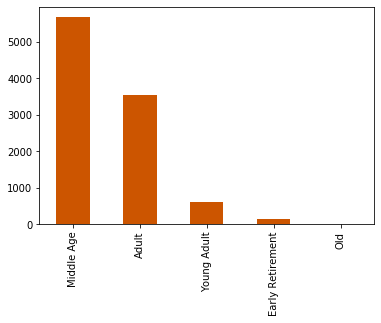

In [10]:
def getagebkt(s):
    a=''
    if s>=18 and s<=25:
        a='Young Adult'
    elif s>=26 and s<=35:
        a='Adult'
    elif s>=36 and s<=68:
        a='Middle Age'
    elif s>=69 and s<=80:
        a='Early Retirement'
    elif s>=81:
        a='Old'
    else:
        a="Unknown"
    return a

df['Age_Bucket'] = df['Age'].apply(getagebkt)
df['Age_Bucket'].value_counts().plot(kind='bar',color='#CC5500')

In [11]:
df['pct_cc'] = df['HasCrCard']/df['NumOfProducts']
df[:5]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Bucket,Age_Bucket,pct_cc
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair,Middle Age,1.000000
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,Middle Age,0.000000
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor,Middle Age,0.333333
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,Middle Age,0.000000
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exceptional,Middle Age,1.000000


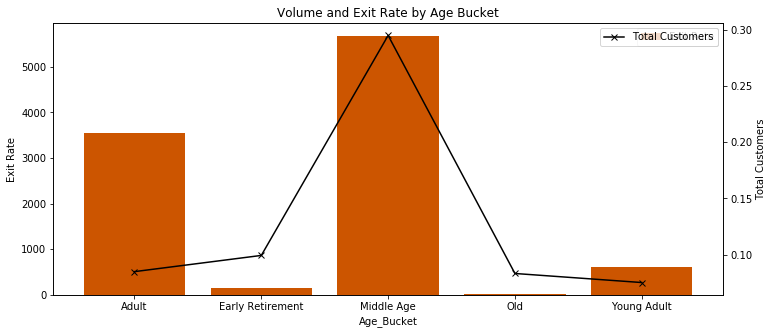

In [18]:
a = df.groupby(['Age_Bucket','Exited'])[['CustomerId']].count().unstack().reset_index()
a['pct_exit'] = a[('CustomerId', 1)]/(a[('CustomerId', 0)]+a[('CustomerId', 1)])
a['total'] = (a[('CustomerId', 0)]+a[('CustomerId', 1)])

fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Volume and Exit Rate by Age Bucket')
ax.set_xlabel('Age_Bucket')
ax2.plot(a['Age_Bucket'], a['pct_exit'], color='black', marker='x')
ax.bar(a['Age_Bucket'], a['total'], color='#CC5500')
ax.set_ylabel('Exit Rate')
ax2.set_ylabel('Total Customers')
ax.legend(['Exit Rate'])
ax2.legend(['Total Customers'], loc='best')
plt.show()

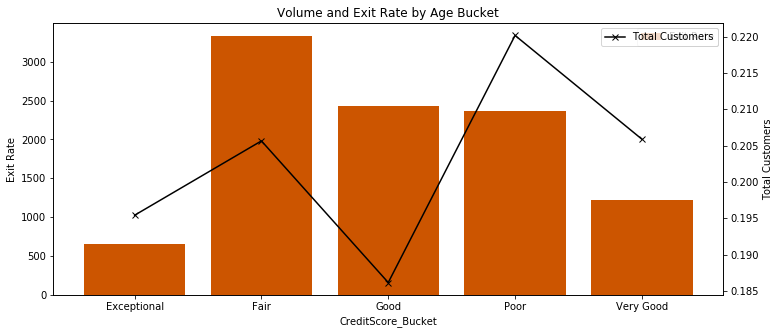

In [15]:
a = df.groupby(['CreditScore_Bucket','Exited'])[['CustomerId']].count().unstack().reset_index()
a['pct_exit'] = a[('CustomerId', 1)]/(a[('CustomerId', 0)]+a[('CustomerId', 1)])
a['total'] = (a[('CustomerId', 0)]+a[('CustomerId', 1)])

fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Volume and Exit Rate by Age Bucket')
ax.set_xlabel('CreditScore_Bucket')
ax2.plot(a['CreditScore_Bucket'], a['pct_exit'], color='black', marker='x')
ax.bar(a['CreditScore_Bucket'], a['total'], color='#CC5500')
ax.set_ylabel('Exit Rate')
ax2.set_ylabel('Total Customers')
ax.legend(['Exit Rate'])
ax2.legend(['Total Customers'], loc='best')
plt.show()

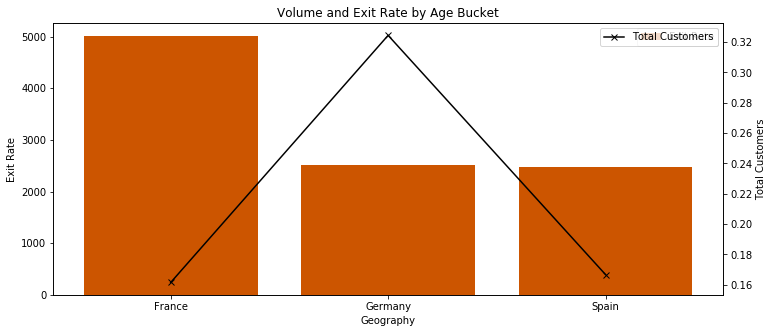

In [16]:
a = df.groupby(['Geography','Exited'])[['CustomerId']].count().unstack().reset_index()
a['pct_exit'] = a[('CustomerId', 1)]/(a[('CustomerId', 0)]+a[('CustomerId', 1)])
a['total'] = (a[('CustomerId', 0)]+a[('CustomerId', 1)])

fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Volume and Exit Rate by Age Bucket')
ax.set_xlabel('Geography')
ax2.plot(a['Geography'], a['pct_exit'], color='black', marker='x')
ax.bar(a['Geography'], a['total'], color='#CC5500')
ax.set_ylabel('Exit Rate')
ax2.set_ylabel('Total Customers')
ax.legend(['Exit Rate'])
ax2.legend(['Total Customers'], loc='best')
plt.show()

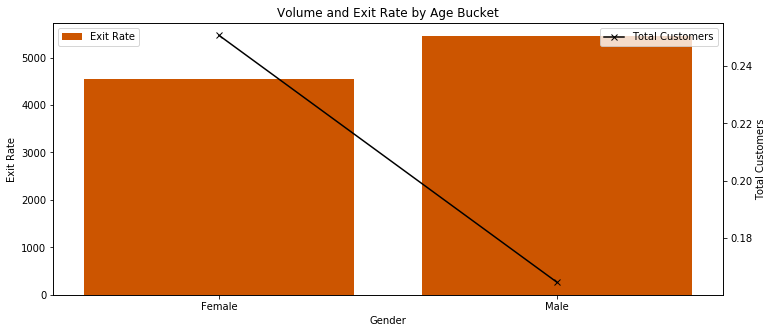

In [17]:
a = df.groupby(['Gender','Exited'])[['CustomerId']].count().unstack().reset_index()
a['pct_exit'] = a[('CustomerId', 1)]/(a[('CustomerId', 0)]+a[('CustomerId', 1)])
a['total'] = (a[('CustomerId', 0)]+a[('CustomerId', 1)])

fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Volume and Exit Rate by Age Bucket')
ax.set_xlabel('Gender')
ax2.plot(a['Gender'], a['pct_exit'], color='black', marker='x')
ax.bar(a['Gender'], a['total'], color='#CC5500')
ax.set_ylabel('Exit Rate')
ax2.set_ylabel('Total Customers')
ax.legend(['Exit Rate'])
ax2.legend(['Total Customers'], loc='best')
plt.show()

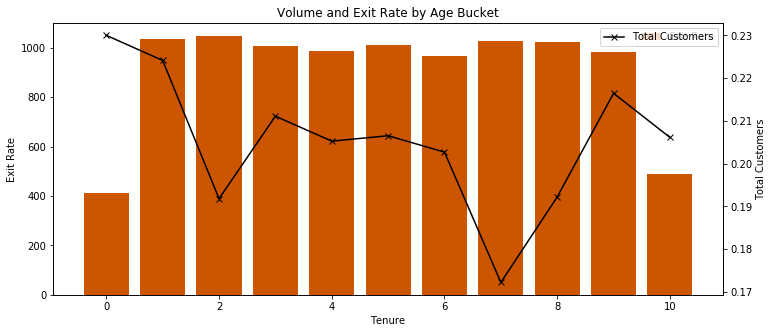

In [19]:
a = df.groupby(['Tenure','Exited'])[['CustomerId']].count().unstack().reset_index()
a['pct_exit'] = a[('CustomerId', 1)]/(a[('CustomerId', 0)]+a[('CustomerId', 1)])
a['total'] = (a[('CustomerId', 0)]+a[('CustomerId', 1)])

fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Volume and Exit Rate by Age Bucket')
ax.set_xlabel('Tenure')
ax2.plot(a['Tenure'], a['pct_exit'], color='black', marker='x')
ax.bar(a['Tenure'], a['total'], color='#CC5500')
ax.set_ylabel('Exit Rate')
ax2.set_ylabel('Total Customers')
ax.legend(['Exit Rate'])
ax2.legend(['Total Customers'], loc='best')
plt.show()

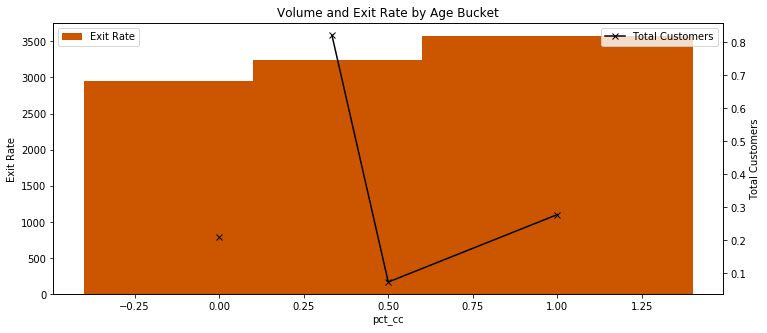

In [20]:
a = df.groupby(['pct_cc','Exited'])[['CustomerId']].count().unstack().reset_index()
a['pct_exit'] = a[('CustomerId', 1)]/(a[('CustomerId', 0)]+a[('CustomerId', 1)])
a['total'] = (a[('CustomerId', 0)]+a[('CustomerId', 1)])

fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Volume and Exit Rate by Age Bucket')
ax.set_xlabel('pct_cc')
ax2.plot(a['pct_cc'], a['pct_exit'], color='black', marker='x')
ax.bar(a['pct_cc'], a['total'], color='#CC5500')
ax.set_ylabel('Exit Rate')
ax2.set_ylabel('Total Customers')
ax.legend(['Exit Rate'])
ax2.legend(['Total Customers'], loc='best')
plt.show()

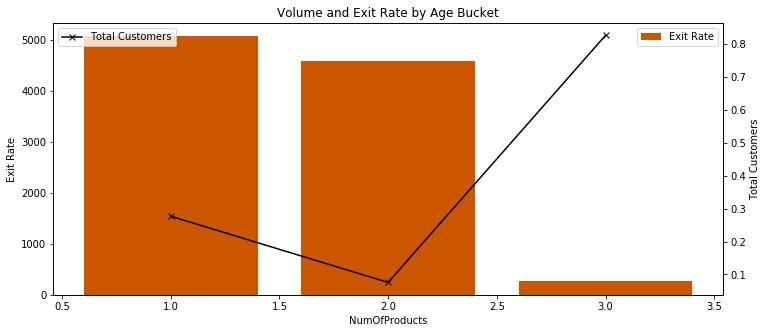

In [21]:
a = df.groupby(['NumOfProducts','Exited'])[['CustomerId']].count().unstack().reset_index()
a['pct_exit'] = a[('CustomerId', 1)]/(a[('CustomerId', 0)]+a[('CustomerId', 1)])
a['total'] = (a[('CustomerId', 0)]+a[('CustomerId', 1)])

fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Volume and Exit Rate by Age Bucket')
ax.set_xlabel('NumOfProducts')
ax2.plot(a['NumOfProducts'], a['pct_exit'], color='black', marker='x')
ax.bar(a['NumOfProducts'], a['total'], color='#CC5500')
ax.set_ylabel('Exit Rate')
ax2.set_ylabel('Total Customers')
ax.legend(['Exit Rate'])
ax2.legend(['Total Customers'], loc='best')
plt.show()

(array([7.000e+00, 6.900e+01, 3.600e+02, 1.173e+03, 2.080e+03, 1.746e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <a list of 10 Patch objects>)

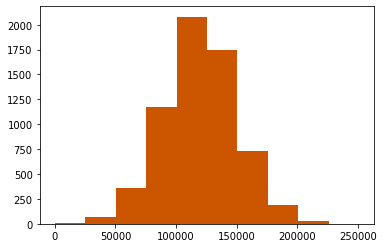

In [22]:
a = df.groupby(['Balance','Exited'])[['CustomerId']].count().unstack().reset_index()
a['pct_exit'] = a[('CustomerId', 1)]/(a[('CustomerId', 0)]+a[('CustomerId', 1)])
a['total'] = (a[('CustomerId', 0)]+a[('CustomerId', 1)])

hist(a['Balance'], color='#CC5500')


In [ ]:
formula = 'target ~ 0 + rate_marriage + age + yrs_married + children ' + \
           ' + religious + educ + C(occupation) + C(occupation_husb)'

In [52]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Bucket,Age_Bucket,pct_cc
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair,Middle Age,1.000000
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,Middle Age,0.000000
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor,Middle Age,0.333333
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,Middle Age,0.000000
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exceptional,Middle Age,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Very Good,Middle Age,0.500000
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor,Adult,1.000000
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Good,Middle Age,0.000000
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Very Good,Middle Age,0.500000


In [65]:
formula = 'Exited ~ 0 + CreditScore + Age + Balance + Tenure + NumOfProducts + C(HasCrCard)+ C(IsActiveMember)' + \
            '+ C(Geography)  + C(Gender) '

In [66]:
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['Exited'].values

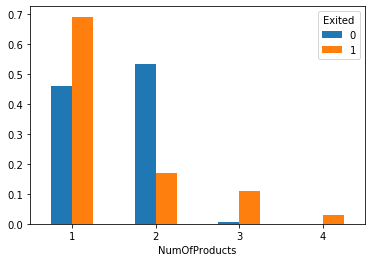

In [67]:
product_vs_target = pd.crosstab(df['NumOfProducts'], df['Exited'])
product_vs_target
total = product_vs_target.apply(sum)
total
product_vs_target /= total
product_vs_target
product_vs_target.plot(kind='bar', rot=0)

In [68]:
Age_vs_target = pd.crosstab(df['Age_Bucket'], df['Exited'])
Age_vs_target

Exited,0,1
Age_Bucket,,
Adult,3241,301
Early Retirement,145,16
Middle Age,4001,1673
Old,11,1
Young Adult,565,46


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\srividya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.793


Test accuracy = 78.76%

In [72]:
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.7876666666666666


In [73]:
# y_train is 0 or 1.
print('Number of positive examples =', len(y_train[y_train==1]))
print('Number of negative examples =', len(y_train[y_train==0]))

Number of positive examples = 1410
Number of negative examples = 5590


In [74]:
negative_examples_in_test = len(y_test[y_test==0])
total_examples_in_test = len(y_test)

print('Number of examples where baseline is correct =', negative_examples_in_test)
print('Baseline accuracy =', negative_examples_in_test * 1.0 / total_examples_in_test)

Number of examples where baseline is correct = 2373
Baseline accuracy = 0.791


In [75]:
model.coef_

array([[-2.08347803e-05, -3.08872448e-04, -1.86726286e-03,
         1.11671619e-03, -3.94003675e-04, -1.39801834e-03,
        -5.04024651e-03,  4.00047651e-02,  3.72532470e-06,
        -1.48678207e-03, -6.04243559e-04]])

In [76]:
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending=False)

Age                        0.040005
C(Geography)[T.Germany]    0.001117
Balance                    0.000004
C(HasCrCard)[0]           -0.000021
C(HasCrCard)[1]           -0.000309
C(Geography)[T.Spain]     -0.000394
NumOfProducts             -0.000604
C(Gender)[T.Male]         -0.001398
Tenure                    -0.001487
C(IsActiveMember)[T.1]    -0.001867
CreditScore               -0.005040
dtype: float64

In [95]:
formula1 = 'Exited ~ 0 + CreditScore + Age + Balance + Tenure + NumOfProducts + pct_cc + C(IsActiveMember)' + \
            '+ C(Geography)  + C(Gender) + C(CreditScore_Bucket) + + C(Age_Bucket) '
Y, X = dmatrices(formula1, df, return_type='dataframe')
y = Y['Exited'].values

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [97]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\srividya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:


prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.7932857142857143


In [99]:
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.788


In [100]:
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending=False)

Age                                   0.040103
C(Age_Bucket)[T.Middle Age]           0.002258
C(IsActiveMember)[0]                  0.001541
C(Geography)[T.Germany]               0.001119
C(CreditScore_Bucket)[T.Very Good]    0.000351
pct_cc                                0.000159
C(CreditScore_Bucket)[T.Good]         0.000078
Balance                               0.000004
C(Age_Bucket)[T.Old]                 -0.000012
C(Age_Bucket)[T.Early Retirement]    -0.000139
C(CreditScore_Bucket)[T.Fair]        -0.000185
C(Age_Bucket)[T.Young Adult]         -0.000335
C(Geography)[T.Spain]                -0.000395
NumOfProducts                        -0.000606
C(CreditScore_Bucket)[T.Poor]        -0.000805
C(Gender)[T.Male]                    -0.001401
Tenure                               -0.001490
C(IsActiveMember)[1]                 -0.001871
CreditScore                          -0.005050
dtype: float64

Lasso Logistic Regression 

In [113]:
formula2 = 'Exited ~ 0 + CreditScore + Age + Balance + Tenure + NumOfProducts + pct_cc + C(IsActiveMember)' + \
            '+ C(Geography)  + C(Gender) '
Y, X = dmatrices(formula2, df, return_type='dataframe')
y = Y['Exited'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [114]:

model2 = LogisticRegression(
    penalty='l1',
    solver='liblinear',  # or 'liblinear'
    )

result2=model2.fit(X_train, y_train)



In [115]:
prediction_train_2= model2.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train_2))

0.8124285714285714


In [116]:
prediction_2 = model2.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_2))

0.8113333333333334


In [118]:
weights2 = Series(model2.coef_[0],
                 index=X.columns.values)
weights2.sort_values(ascending=False)

C(Geography)[T.Germany]    0.738328
pct_cc                     0.208165
Age                        0.069854
C(Geography)[T.Spain]      0.064204
Balance                    0.000003
CreditScore               -0.000606
Tenure                    -0.002454
NumOfProducts             -0.024001
C(Gender)[T.Male]         -0.574561
C(IsActiveMember)[0]      -1.490394
C(IsActiveMember)[1]      -2.597817
dtype: float64

In [119]:
import seaborn as sns
from sklearn import metrics

In [125]:
score = metrics.accuracy_score(y_test, prediction_2)

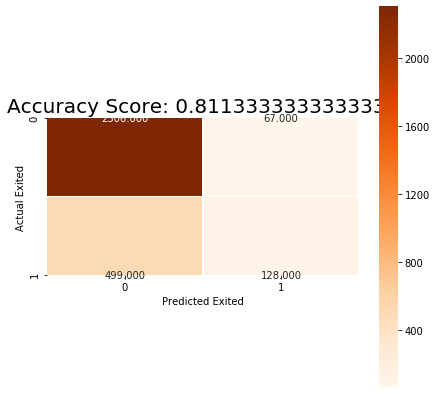

In [134]:
cm = metrics.confusion_matrix(y_test, prediction_2)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual Exited');
plt.xlabel('Predicted Exited');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size =20);

In [135]:
print(cm)

[[2306   67]
 [ 499  128]]




**Observations**

* Credit Score has a **negative** weight
    * The Higher the credit score the more likely the customer will exit. 
* Age has a positive weight 
    * Middle aged customers tend to exit more. Middle aged customers do have a better credit score than younger customers. 
    * 
* Surprisingly Number of Products which shows up as an important variable in other models doesn't show up in any of the logistic regression. 
